In [1]:
import numpy as np
import pandas as pd
import xarray as xr


import matplotlib as mp
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
import glob


In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cf
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [3]:
import pandas as pd
import io

ds = xr.open_dataset('threshold_0.2/harmonics_v3_withTC.nc')
ds = ds.where((ds.lon !=124.75) & (ds.lat != 10.5))

In [4]:
### Function to plot basemap and lon lat labels ###
def plot_background(ax):
    ax.add_feature(cf.LAKES.with_scale('10m'),facecolor='none', edgecolor='black',linewidth=0.8)
    ax.add_feature(cf.COASTLINE.with_scale('10m'),facecolor='none', edgecolor='black', linewidth=1) 
    return ax

def plot_ticks(ax):
    ax.set_yticks(np.arange(5, 22, 5), crs=ccrs.PlateCarree())
    ax.set_xticks(np.arange(115, 127, 5), crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(LongitudeFormatter())
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    return ax

In [5]:
dsa = xr.open_dataset('threshold_0.2/harmonics_v3_withTC.nc')
dsa = dsa.where((ds.lon !=124.75) & (ds.lat != 10.5))

In [6]:

lat = ds['lat'][:]
lon = ds['lon'][:]
f_pa_h1 = dsa['f_pa_harm1']
f_pa_h2 = dsa['f_pa_harm2']
f_pf_h1 = dsa['f_pf_harm1']
f_pf_h2 = dsa['f_pf_harm2']
f_pi_h1 = dsa['f_pi_harm1']
f_pi_h2 = dsa['f_pi_harm2']
amp_pa_harm1 = ds['amp_pa_harm1']
amp_pa_harm2 = dsa['amp_pa_harm2_updated']
amp_pf_harm1 = ds['amp_pf_harm1']
amp_pf_harm2 = dsa['amp_pf_harm2_updated']
amp_pi_harm1 = ds['amp_pi_harm1']
amp_pi_harm2 = dsa['amp_pi_harm2_updated']
f_pa_h1 = f_pa_h1[:,:,0].transpose()
f_pa_h2 = f_pa_h2[:,:,0].transpose()
f_pf_h1 = f_pf_h1[:,:,0].transpose()
f_pf_h2 = f_pf_h2[:,:,0].transpose()
f_pi_h1 = f_pi_h1[:,:,0].transpose()
f_pi_h2 = f_pi_h2[:,:,0].transpose()
phs_pa_harm1 = ds['phs_pa_harm1']
phs_pf_harm1 = ds['phs_pf_harm1']
phs_pi_harm1 = ds['phs_pi_harm1']
phs_pa_harm2_peak1 = ds['phs_pa_harm2_peak1']
phs_pa_harm2_peak2 = ds['phs_pa_harm2_peak2']
phs_pf_harm2_peak1 = ds['phs_pf_harm2_peak1']
phs_pf_harm2_peak2 = ds['phs_pf_harm2_peak2']
phs_pi_harm2_peak1 = ds['phs_pi_harm2_peak1']
phs_pi_harm2_peak2 = ds['phs_pi_harm2_peak2']

amp_pa_harm2_peak1 = ds['amp_pa_harm2_peak1']
amp_pa_harm2_peak2 = ds['amp_pa_harm2_peak2']
amp_pf_harm2_peak1 = ds['amp_pf_harm2_peak1']
amp_pf_harm2_peak2 = ds['amp_pf_harm2_peak2']
amp_pi_harm2_peak1 = ds['amp_pi_harm2_peak1']
amp_pi_harm2_peak2 = ds['amp_pi_harm2_peak2']

var_pa_harm1 = ds['var_pa_harm1']
var_pa_harm2 = ds['var_pa_harm2']
var_pf_harm1 = ds['var_pf_harm1']
var_pf_harm2 = ds['var_pf_harm2']
var_pi_harm1 = ds['var_pi_harm1']
var_pi_harm2 = ds['var_pi_harm2']

In [7]:
back = var_pa_harm1.to_dataframe("val").reset_index()
back = back[back['val'] > 0]
back

,lon,lat,val
52,117.0623,7.985905,6.101829
705,117.4356,8.550700,48.603733
1346,117.5013,8.876000,46.362628
1970,117.6346,8.677431,67.159098
2607,117.6480,9.019500,38.804498
...,...,...,...
388785,126.4136,8.036845,39.619046
389383,126.4482,7.049400,68.503053
390033,126.4543,7.790300,47.571051
390649,126.5649,7.327000,37.058766


In [8]:
back = var_pa_harm1.to_dataframe("val").reset_index()
back = back[back['val'] > 0]
h = f_pa_h1.transpose().to_dataframe("val").reset_index()
h= h[h['val'] > 2.5746]
h['sig'] = h['val']
h = h[['lon','lat','sig']]
back = pd.merge(back, h, on=["lon", "lat"], how="left").dropna()
back

,lon,lat,val,sig
1,117.4356,8.550700,48.603733,9.681063
2,117.5013,8.876000,46.362628,8.953264
3,117.6346,8.677431,67.159098,21.472267
4,117.6480,9.019500,38.804498,6.657847
5,117.8392,8.774300,32.349834,5.020661
...,...,...,...,...
625,126.4136,8.036845,39.619046,6.747706
626,126.4482,7.049400,68.503053,22.278211
627,126.4543,7.790300,47.571051,9.527046
628,126.5649,7.327000,37.058766,6.155469


/var/folders/m6/4qg_57053p93nhjn29vdbv940000gp/T/ipykernel_5083/4209680895.py:149: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{images_dir}/fig3_withTC.png", dpi=300, frameon=False, facecolor='white', bbox_inches="tight")


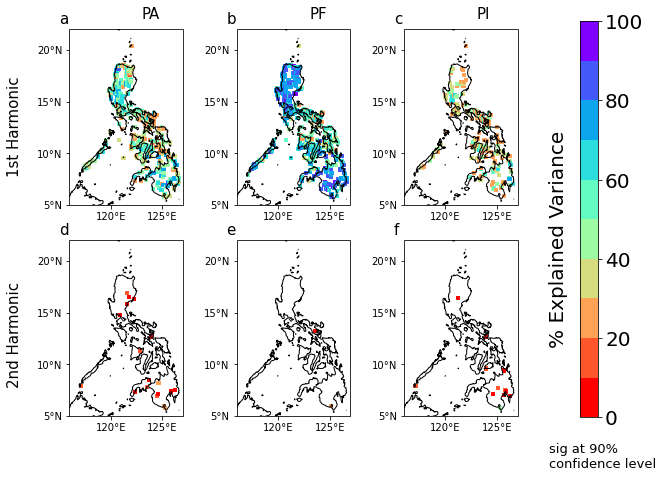

In [9]:
a4_dims = (20,20)
clvls = np.arange(0, 24, 1)
cmap = plt.cm.rainbow_r

s = 10
fig = plt.figure(figsize=(8.5,11))
gs = fig.add_gridspec(3, 3)
ax1 = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree())
plot_background(ax1)
plot_ticks(ax1)
bounds = np.linspace(0, 100, 11)
norm = mcolors.BoundaryNorm(bounds,cmap.N)   

back = var_pa_harm1.to_dataframe("val").reset_index()
back = back[back['val'] > 0]
h = f_pa_h1.transpose().to_dataframe("val").reset_index()
h= h[h['val'] > 2.5746]
h['sig'] = h['val']
h = h[['lon','lat','sig']]
back = pd.merge(back, h, on=["lon", "lat"], how="left").dropna()
#back= back[back['val'] > 25]
m_var_pa_harm1 = back

cs = ax1.scatter(back.iloc[:,0], back.iloc[:,1], c=back.iloc[:,2], norm=norm, cmap='rainbow_r',  s=s, marker="s", transform=ccrs.PlateCarree())

ax1.set_xlim(116,127)
ax1.set_ylim(5,22)
ax1.text(110, 8, '1st Harmonic', rotation=90, fontsize=15)
ax1.text(123, 23, 'PA', fontsize=15)


ax2 = fig.add_subplot(gs[1, 0], projection=ccrs.PlateCarree())
plot_background(ax2)
plot_ticks(ax2)
norm = mcolors.BoundaryNorm(bounds,cmap.N)   

back = var_pa_harm2.to_dataframe("val").reset_index()
m_var_pa_harm2 = back
h = f_pa_h2.transpose().to_dataframe("val").reset_index()
h= h[h['val'] > 2.5746]
h['sig'] = h['val']
h = h[['lon','lat','sig']]
back = pd.merge(back, h, on=["lon", "lat"], how="left").dropna()


cs = ax2.scatter(back.iloc[:,0], back.iloc[:,1], c=back.iloc[:,2], norm=norm, cmap='rainbow_r',  s=s, marker="s", transform=ccrs.PlateCarree())

ax2.set_xlim(116,127)
ax2.set_ylim(5,22)
ax2.text(110, 8, '2nd Harmonic', rotation=90, fontsize=15)


#############################################
ax3 = fig.add_subplot(gs[0, 1], projection=ccrs.PlateCarree())
plot_background(ax3)
plot_ticks(ax3)
norm = mcolors.BoundaryNorm(bounds,cmap.N)   

back = var_pf_harm1.to_dataframe("val").reset_index()
h = f_pf_h1.transpose().to_dataframe("val").reset_index()
h= h[h['val'] > 2.5746]
h['sig'] = h['val']
h = h[['lon','lat','sig']]
back = pd.merge(back, h, on=["lon", "lat"], how="left").dropna()
m_var_pf_harm1 = back

cs = ax3.scatter(back.iloc[:,0], back.iloc[:,1], c=back.iloc[:,2], norm=norm, cmap='rainbow_r', s=s, marker="s", transform=ccrs.PlateCarree())

ax3.set_xlim(116,127)
ax3.set_ylim(5,22)
ax3.text(123, 23, 'PF', fontsize=15)


ax4 = fig.add_subplot(gs[1, 1], projection=ccrs.PlateCarree())
plot_background(ax4)
plot_ticks(ax4)
norm = mcolors.BoundaryNorm(bounds,cmap.N)   
back = var_pf_harm2.to_dataframe("val").reset_index()
m_var_pf_harm2 = back
h = f_pf_h2.transpose().to_dataframe("val").reset_index()
h= h[h['val'] > 2.5746]
h['sig'] = h['val']
h = h[['lon','lat','sig']]
back = pd.merge(back, h, on=["lon", "lat"], how="left").dropna()


cs = ax4.scatter(back.iloc[:,0], back.iloc[:,1], c=back.iloc[:,2], norm=norm, cmap='rainbow_r',  s=s, marker="s", transform=ccrs.PlateCarree())

ax4.set_xlim(116,127)
ax4.set_ylim(5,22)

#############################################
ax5 = fig.add_subplot(gs[0, 2], projection=ccrs.PlateCarree())
plot_background(ax5)
plot_ticks(ax5)
norm = mcolors.BoundaryNorm(bounds,cmap.N)  

back = var_pi_harm1.to_dataframe("val").reset_index()
h = f_pi_h1.transpose().to_dataframe("val").reset_index()
h= h[h['val'] > 2.5746]
h['sig'] = h['val']
h = h[['lon','lat','sig']]
back = pd.merge(back, h, on=["lon", "lat"], how="left").dropna()
m_var_pi_harm1 = back

cs = ax5.scatter(back.iloc[:,0], back.iloc[:,1], c=back.iloc[:,2], norm=norm, cmap='rainbow_r', s=s, marker="s", transform=ccrs.PlateCarree())
ax5.set_xlim(116,127)
ax5.set_ylim(5,22)
ax5.text(123, 23, 'PI', fontsize=15)

ax6 = fig.add_subplot(gs[1, 2], projection=ccrs.PlateCarree())
plot_background(ax6)
plot_ticks(ax6)
norm = mcolors.BoundaryNorm(bounds,cmap.N)   

back = var_pi_harm2.to_dataframe("val").reset_index()
m_var_pi_harm2 = back
h = f_pi_h2.transpose().to_dataframe("val").reset_index()
h= h[h['val'] > 2.5746]
h['sig'] = h['val']
h = h[['lon','lat','sig']]
back = pd.merge(back, h, on=["lon", "lat"], how="left").dropna()


cs = ax6.scatter(back.iloc[:,0], back.iloc[:,1], c=back.iloc[:,2], norm=norm, cmap='rainbow_r', s=s, marker="s", transform=ccrs.PlateCarree())

ax6.set_xlim(116,127)
ax6.set_ylim(5,22)
##################
ax1.text(115, 22.5, 'a',  fontsize=15)
ax3.text(115, 22.5, 'b',  fontsize=15)
ax5.text(115, 22.5, 'c',  fontsize=15)
ax2.text(115, 22.5, 'd',  fontsize=15)
ax4.text(115, 22.5, 'e',  fontsize=15)
ax6.text(115, 22.5, 'f',  fontsize=15)


plt.text(130, 12, '% Explained Variance', rotation=90, fontsize=20)
plt.text(130, 0, 'sig at 90% \nconfidence level', fontsize=13)

cax = fig.add_axes([0.98, 0.39, 0.03, 0.5])
cb = fig.colorbar(cs, cax=cax , ticks=bounds)
cb.set_ticks([0, 20, 40, 60, 80, 100])
cb.set_ticklabels([0, 20, 40, 60, 80, 100])
cb.ax.tick_params(labelsize=20)


images_dir = 'Images'
plt.savefig(f"{images_dir}/fig3_withTC.png", dpi=300, frameon=False, facecolor='white', bbox_inches="tight")

In [10]:
m_var_pa_harm1['pa_h1'] = m_var_pa_harm1['val']
m_var_pa_harm1 = m_var_pa_harm1[['lon','lat','pa_h1']]
m_var_pa_harm2['pa_h2'] = m_var_pa_harm2['val']
m_var_pa_harm2 = m_var_pa_harm2[['lon','lat','pa_h2']]
m_var_pf_harm1['pf_h1'] = m_var_pf_harm1['val']
m_var_pf_harm2['pf_h2'] = m_var_pf_harm2['val']
m_var_pf_harm1 = m_var_pf_harm1[['lon','lat','pf_h1']]
m_var_pf_harm2 = m_var_pf_harm2[['lon','lat','pf_h2']]
m_var_pi_harm1['pi_h1'] = m_var_pi_harm1['val']
m_var_pi_harm2['pi_h2'] = m_var_pi_harm2['val']
m_var_pi_harm1 = m_var_pi_harm1[['lon','lat','pi_h1']]
m_var_pi_harm2 = m_var_pi_harm2[['lon','lat','pi_h2']]


In [11]:
m_var_pa_harm1

,lon,lat,pa_h1
1,117.4356,8.550700,48.603733
2,117.5013,8.876000,46.362628
3,117.6346,8.677431,67.159098
4,117.6480,9.019500,38.804498
5,117.8392,8.774300,32.349834
...,...,...,...
625,126.4136,8.036845,39.619046
626,126.4482,7.049400,68.503053
627,126.4543,7.790300,47.571051
628,126.5649,7.327000,37.058766


In [12]:
m_var_pa = pd.merge(m_var_pa_harm1, m_var_pa_harm2, on=["lon", "lat"], how="left")
m_var_pa['sum'] = m_var_pa.loc[:,'pa_h1':'pa_h2'].sum(axis=1)

m_var_pf = pd.merge(m_var_pf_harm1, m_var_pf_harm2, on=["lon", "lat"], how="left")
m_var_pf['sum'] = m_var_pf.loc[:,'pf_h1':'pf_h2'].sum(axis=1)

m_var_pi = pd.merge(m_var_pi_harm1, m_var_pi_harm2, on=["lon", "lat"], how="left")
m_var_pi['sum'] = m_var_pi.loc[:,'pi_h1':'pi_h2'].sum(axis=1)
m_var_pi

,lon,lat,pi_h1,pi_h2,sum
0,117.6346,8.677431,37.448668,17.455740,54.904408
1,117.8392,8.774300,25.056440,6.664660,31.721101
2,118.4222,9.283400,44.986998,19.147332,64.134330
3,118.7557,9.740500,30.397070,1.742175,32.139244
4,119.1783,10.411600,44.902072,5.846291,50.748363
...,...,...,...,...,...
208,126.2036,6.959000,43.140925,14.228194,57.369118
209,126.2927,8.398800,20.710541,0.597754,21.308295
210,126.3006,8.224600,45.124678,0.698914,45.823592
211,126.3114,8.887600,60.745833,0.514881,61.260714


In [13]:
m_var_pf[(m_var_pf['sum'] > 60) ]

,lon,lat,pf_h1,pf_h2,sum
1,117.4356,8.550700,86.983479,6.528742,93.512222
2,117.5013,8.876000,67.426228,23.770765,91.196993
3,117.6346,8.677431,75.587363,10.994531,86.581895
4,117.6480,9.019500,80.570918,10.612201,91.183119
5,117.8392,8.774300,78.042500,2.873598,80.916098
...,...,...,...,...,...
587,126.4136,8.036845,78.619156,0.756375,79.375531
588,126.4482,7.049400,80.225326,4.080932,84.306259
589,126.4543,7.790300,60.784152,32.055628,92.839781
590,126.5649,7.327000,81.167586,1.360359,82.527945


In [14]:
m_var_pa

,lon,lat,pa_h1,pa_h2,sum
0,117.4356,8.550700,48.603733,17.898808,66.502541
1,117.5013,8.876000,46.362628,30.874100,77.236728
2,117.6346,8.677431,67.159098,16.575419,83.734517
3,117.6480,9.019500,38.804498,5.907368,44.711866
4,117.8392,8.774300,32.349834,11.038953,43.388786
...,...,...,...,...,...
529,126.4136,8.036845,39.619046,16.855730,56.474776
530,126.4482,7.049400,68.503053,12.783993,81.287045
531,126.4543,7.790300,47.571051,28.239450,75.810501
532,126.5649,7.327000,37.058766,1.924596,38.983362


In [15]:
amp_pi_harm2_peak1.transpose().to_dataframe("val").reset_index().dropna()

,lon,lat,val
52,117.0623,7.985905,1.670206
705,117.4356,8.550700,1.252521
1346,117.5013,8.876000,1.141857
1970,117.6346,8.677431,1.140540
2607,117.6480,9.019500,1.122423
...,...,...,...
388785,126.4136,8.036845,1.263182
389383,126.4482,7.049400,1.178751
390033,126.4543,7.790300,1.112837
390649,126.5649,7.327000,1.174995


In [16]:
back = amp_pi_harm1.to_dataframe("val").reset_index()
back = back[back['val'] > 0]
back['val'].max()

0.718422566760927

In [17]:
back = amp_pf_harm2_peak1.transpose().to_dataframe("val").reset_index()
back = back[back['val'] > 0]
back['val'].max()
back

,lon,lat,val
52,117.0623,7.985905,1.074881
705,117.4356,8.550700,1.144532
1346,117.5013,8.876000,1.268319
1970,117.6346,8.677431,1.182498
2607,117.6480,9.019500,1.166022
...,...,...,...
388164,126.3621,8.181700,1.066428
388785,126.4136,8.036845,1.052979
389383,126.4482,7.049400,1.106598
390033,126.4543,7.790300,1.417321


/var/folders/m6/4qg_57053p93nhjn29vdbv940000gp/T/ipykernel_5083/588196666.py:128: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{images_dir}/fig4_withTC.png", dpi=500, frameon=False, facecolor='white', bbox_inches="tight")


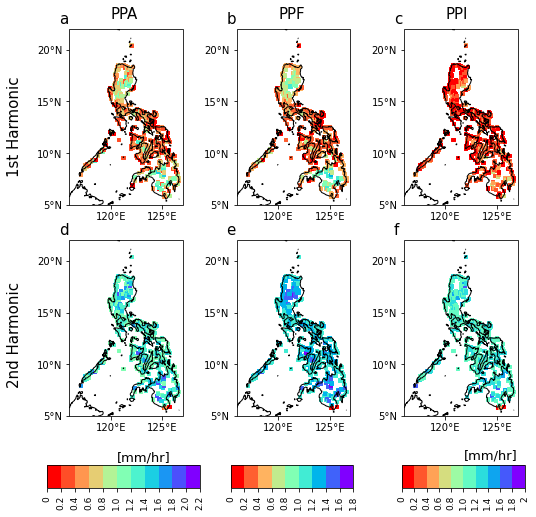

In [18]:
a4_dims = (20,20)
clvls = np.arange(0, 24, 1)
cmap = plt.cm.rainbow_r

s = 10
fig = plt.figure(figsize=(8.5,11))
gs = fig.add_gridspec(3, 3)
ax1 = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree())
plot_background(ax1)
plot_ticks(ax1)
bounds = np.linspace(0, 1.2, 7)
bounds = np.linspace(0, 2.2, 12)
norm = mcolors.BoundaryNorm(bounds,cmap.N)   
back = amp_pa_harm1.to_dataframe("val").reset_index()
back = back[back['val'] > 0]
cs = ax1.scatter(back.iloc[:,0], back.iloc[:,1], c=back.iloc[:,2], norm=norm, cmap='rainbow_r', s=s, marker="s", transform=ccrs.PlateCarree())
ax1.set_xlim(116,127)
ax1.set_ylim(5,22)
ax1.text(110, 8, '1st Harmonic', rotation=90, fontsize=15)
ax1.text(120, 23, 'PPA', fontsize=15)


ax2 = fig.add_subplot(gs[1, 0], projection=ccrs.PlateCarree())
plot_background(ax2)
plot_ticks(ax2)
norm = mcolors.BoundaryNorm(bounds,cmap.N)   
back = amp_pa_harm2_peak1.transpose().to_dataframe("val").reset_index()
back = back[back['val'] > 0]
cs = ax2.scatter(back.iloc[:,0], back.iloc[:,1], c=back.iloc[:,2], norm=norm, cmap='rainbow_r', s=s, marker="s", transform=ccrs.PlateCarree())
ax2.set_xlim(116,127)
ax2.set_ylim(5,22)
ax2.text(110, 8, '2nd Harmonic', rotation=90, fontsize=15)


cax = fig.add_axes([0.11, 0.3, 0.25, 0.03])
cb = fig.colorbar(cs, cax=cax, orientation='horizontal')
labels = np.arange(0,1.4,0.2)
labels = np.arange(0,2.4,0.2)
loc    = labels 
cb.set_ticks(loc)
cb.set_ticklabels([0, 0.2, 0.4, 0.6, 0.8, 1.0,1.2])
labels = [0, 0.2, 0.4, 0.6, 0.8, 1.0,1.2,1.4, 1.6, 1.8, 2.0,2.2]
cb.ax.tick_params(labelsize=9)
cb.ax.set_xticklabels(labels, rotation=90)
plt.text(1.0, 2.5, '[mm/hr]', fontsize=13)
#############################################
ax3 = fig.add_subplot(gs[0, 1], projection=ccrs.PlateCarree())
plot_background(ax3)
plot_ticks(ax3)
bounds = np.linspace(0, 1, 6)
bounds = np.linspace(0, 1.8, 10)
norm = mcolors.BoundaryNorm(bounds,cmap.N)   
back = amp_pf_harm1.to_dataframe("val").reset_index()
back = back[back['val'] > 0]
cs = ax3.scatter(back.iloc[:,0], back.iloc[:,1], c=back.iloc[:,2], norm=norm, cmap='rainbow_r', s=s, marker="s", transform=ccrs.PlateCarree())
ax3.set_xlim(116,127)
ax3.set_ylim(5,22)
ax3.text(120, 23, 'PPF', fontsize=15)

ax4 = fig.add_subplot(gs[1, 1], projection=ccrs.PlateCarree())
plot_background(ax4)
plot_ticks(ax4)
norm = mcolors.BoundaryNorm(bounds,cmap.N)   
back = amp_pf_harm2_peak1.transpose().to_dataframe("val").reset_index()
back = back[back['val'] > 0]
cs = ax4.scatter(back.iloc[:,0], back.iloc[:,1], c=back.iloc[:,2], norm=norm, cmap='rainbow_r', s=s, marker="s", transform=ccrs.PlateCarree())
ax4.set_xlim(116,127)
ax4.set_ylim(5,22)



cax = fig.add_axes([0.41, 0.3, 0.2, 0.03])
cb = fig.colorbar(cs, cax=cax, orientation='horizontal')
labels = np.arange(0,1.2,0.2)
labels = np.arange(0,2.0,0.2)
loc    = labels 
cb.set_ticks(loc)
#cb.set_ticklabels([0, 0.2, 0.4, 0.6, 0.8, 1.0])
labels = [0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8]
cb.ax.set_xticklabels(labels, rotation=90)
cb.ax.tick_params(labelsize=9)


#############################################
ax5 = fig.add_subplot(gs[0, 2], projection=ccrs.PlateCarree())
plot_background(ax5)
plot_ticks(ax5)
bounds = np.linspace(0, 1, 6)
bounds = np.linspace(0, 2, 11)
norm = mcolors.BoundaryNorm(bounds,cmap.N)   
back = amp_pi_harm1.to_dataframe("val").reset_index()
back = back[back['val'] > 0]
cs = ax5.scatter(back.iloc[:,0], back.iloc[:,1], c=back.iloc[:,2], norm=norm, cmap='rainbow_r', s=s, marker="s", transform=ccrs.PlateCarree())
ax5.set_xlim(116,127)
ax5.set_ylim(5,22)
ax5.text(120, 23, 'PPI', fontsize=15)

ax6 = fig.add_subplot(gs[1, 2], projection=ccrs.PlateCarree())
plot_background(ax6)
plot_ticks(ax6)
norm = mcolors.BoundaryNorm(bounds,cmap.N)   
back = amp_pi_harm2_peak1.transpose().to_dataframe("val").reset_index()
back = back[back['val'] > 0]
cs = ax6.scatter(back.iloc[:,0], back.iloc[:,1], c=back.iloc[:,2], norm=norm, cmap='rainbow_r', s=s, marker="s", transform=ccrs.PlateCarree())
ax6.set_xlim(116,127)
ax6.set_ylim(5,22)

ax1.text(115, 22.5, 'a',  fontsize=15)
ax3.text(115, 22.5, 'b',  fontsize=15)
ax5.text(115, 22.5, 'c',  fontsize=15)
ax2.text(115, 22.5, 'd',  fontsize=15)
ax4.text(115, 22.5, 'e',  fontsize=15)
ax6.text(115, 22.5, 'f',  fontsize=15)
##################
cax = fig.add_axes([0.69, 0.3, 0.2, 0.03])
cb = fig.colorbar(cs, cax=cax, orientation='horizontal')
labels = np.arange(0,1.2,0.2)
labels = np.arange(0,2.2,0.2)
loc    = labels 
cb.set_ticks(loc)
#cb.set_ticklabels([0, 0.2, 0.4, 0.6, 0.8, 1.0])
labels = [0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2]
cb.ax.tick_params(labelsize=9)
cb.ax.set_xticklabels(labels, rotation=90)
plt.text(1.0, 2.5, '[mm/hr]', fontsize=13)

images_dir = 'Images'
plt.savefig(f"{images_dir}/fig4_withTC.png", dpi=500, frameon=False, facecolor='white', bbox_inches="tight")

In [19]:
from matplotlib.colors import LinearSegmentedColormap
#7b241c
#ba4a00
#ca6f1e
#e67e22
#f39c12

color_dict1 = {'skyblue': '#85c1e9',
               'brown1': '#7b241c',
               'brown2': '#ba4a00',
               'brown3': '#e67e22',
               'brown4': '#f39c12',
               'green1': '#3d9533',
               'green2': '#3ebe2f',
               'green3': '#86f762',
               'green4': '#b9f76a',
               'blue1': '#1f618d',
               'blue2': '#2980b9',
               'blue3': '#3498db',
               'skyblue': '#85c1e9'
               }

mycolorbar1 = LinearSegmentedColormap.from_list('mycolorbar1', [
    color_dict1['skyblue'],
    color_dict1['brown2'],
    color_dict1['brown2'],
    color_dict1['brown3'],
    color_dict1['brown3'],
    color_dict1['brown4'],
    color_dict1['brown4'],
    color_dict1['green1'],
    color_dict1['green1'],
    color_dict1['green2'],
    color_dict1['green2'],
    color_dict1['green3'],
    color_dict1['green3'],
    color_dict1['green4'],
    color_dict1['green4'],
    color_dict1['blue1'],
    color_dict1['blue1'],
    color_dict1['blue2'],
    color_dict1['blue2'],
    color_dict1['blue3'],
    
    color_dict1['blue3'],
    color_dict1['skyblue']])

In [20]:
phs_pa_harm1.to_dataframe("val").reset_index()

back = phs_pa_harm1.to_dataframe("val").reset_index()
back = back[back['val'] > 0]
back

,lon,lat,val
52,117.0623,7.985905,23.123586
705,117.4356,8.550700,13.427886
1346,117.5013,8.876000,15.065038
1970,117.6346,8.677431,13.808096
2607,117.6480,9.019500,14.567159
...,...,...,...
388785,126.4136,8.036845,18.385415
389383,126.4482,7.049400,19.150038
390033,126.4543,7.790300,20.133081
390649,126.5649,7.327000,18.800528


In [21]:
back.groupby(['lon','lat']).agg({'val': ['mean']}).droplevel(axis=1, level=0).reset_index()

,lon,lat,mean
0,117.0623,7.985905,23.123586
1,117.4356,8.550700,13.427886
2,117.5013,8.876000,15.065038
3,117.6346,8.677431,13.808096
4,117.6480,9.019500,14.567159
...,...,...,...
625,126.4136,8.036845,18.385415
626,126.4482,7.049400,19.150038
627,126.4543,7.790300,20.133081
628,126.5649,7.327000,18.800528


/var/folders/m6/4qg_57053p93nhjn29vdbv940000gp/T/ipykernel_5083/1117785625.py:153: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{images_dir}/fig5_withTC.png", dpi=300, frameon=False, facecolor='white', bbox_inches="tight")


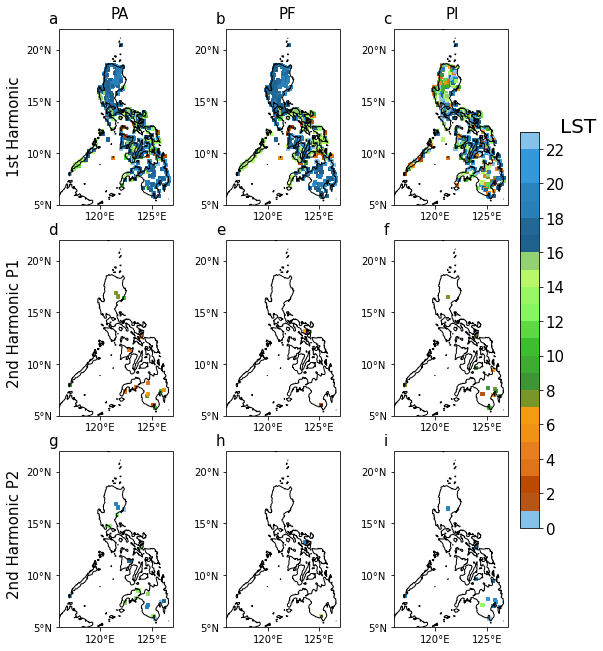

In [23]:
a4_dims = (20,20)

cmap = mycolorbar1
bounds = np.linspace(0, 23, 24)
norm = mcolors.BoundaryNorm(bounds,cmap.N)   
s = 10
fig = plt.figure(figsize=(8.5,11))
gs = fig.add_gridspec(3, 3)
ax1 = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree())
plot_background(ax1)
plot_ticks(ax1)
back = phs_pa_harm1.to_dataframe("val").reset_index()
back = back[back['val'] > 0]
cs = ax1.scatter(back.iloc[:,0], back.iloc[:,1], c=back.iloc[:,2], norm=norm, cmap=cmap, s=s, marker="s",  transform=ccrs.PlateCarree())
ax1.set_xlim(116,127)
ax1.set_ylim(5,22)
ax1.text(121, 23, 'PA', fontsize=15)
ax1.text(111, 8, '1st Harmonic', rotation=90, fontsize=15)

ax2 = fig.add_subplot(gs[1, 0], projection=ccrs.PlateCarree())
plot_background(ax2)
plot_ticks(ax2)
back = phs_pa_harm2_peak1.transpose().to_dataframe("val").reset_index()
back = back[back['val'] > 0]
h = f_pa_h2.transpose().to_dataframe("val").reset_index()
h= h[h['val'] > 2.5746]
h['sig'] = h['val']
h = h[['lon','lat','sig']]
back = pd.merge(back, h, on=["lon", "lat"], how="left").dropna()

cs = ax2.scatter(back.iloc[:,0], back.iloc[:,1], c=back.iloc[:,2], norm=norm, cmap=cmap, s=s, marker="s",  transform=ccrs.PlateCarree())
ax2.set_xlim(116,127)
ax2.set_ylim(5,22)
ax2.text(111, 8, '2nd Harmonic P1', rotation=90, fontsize=15)

ax3 = fig.add_subplot(gs[2, 0], projection=ccrs.PlateCarree())
plot_background(ax3)
plot_ticks(ax3)
back = phs_pa_harm2_peak2.transpose().to_dataframe("val").reset_index()
back = back[back['val'] > 0]
h = f_pa_h2.transpose().to_dataframe("val").reset_index()
h= h[h['val'] > 2.5746]
h['sig'] = h['val']
h = h[['lon','lat','sig']]
back = pd.merge(back, h, on=["lon", "lat"], how="left").dropna()
cs = ax3.scatter(back.iloc[:,0], back.iloc[:,1], c=back.iloc[:,2], norm=norm, cmap=cmap, s=s, marker="s",  transform=ccrs.PlateCarree())
ax3.set_xlim(116,127)
ax3.set_ylim(5,22)
ax3.text(111, 8, '2nd Harmonic P2', rotation=90, fontsize=15)
######################
ax4 = fig.add_subplot(gs[0, 1], projection=ccrs.PlateCarree())
plot_background(ax4)
plot_ticks(ax4)
back = phs_pf_harm1.to_dataframe("val").reset_index()
back = back[back['val'] > 0]
cs = ax4.scatter(back.iloc[:,0], back.iloc[:,1], c=back.iloc[:,2], norm=norm, cmap=cmap, s=s, marker="s",  transform=ccrs.PlateCarree())
ax4.set_xlim(116,127)
ax4.set_ylim(5,22)
ax4.text(121, 23, 'PF', fontsize=15)

ax5 = fig.add_subplot(gs[1, 1], projection=ccrs.PlateCarree())
plot_background(ax5)
plot_ticks(ax5)
back = phs_pf_harm2_peak1.transpose().to_dataframe("val").reset_index()
back = back[back['val'] > 0]
h = f_pf_h2.transpose().to_dataframe("val").reset_index()
h= h[h['val'] > 2.5746]
h['sig'] = h['val']
h = h[['lon','lat','sig']]
back = pd.merge(back, h, on=["lon", "lat"], how="left").dropna()
ax5.scatter(back.iloc[:,0], back.iloc[:,1], c=back.iloc[:,2], norm=norm, cmap=cmap, s=s, marker="s",  transform=ccrs.PlateCarree())
ax5.set_xlim(116,127)
ax5.set_ylim(5,22)

ax6 = fig.add_subplot(gs[2, 1], projection=ccrs.PlateCarree())
plot_background(ax6)
plot_ticks(ax6)
back = phs_pf_harm2_peak2.transpose().to_dataframe("val").reset_index()
back = back[back['val'] > 0]
h = f_pf_h2.transpose().to_dataframe("val").reset_index()
h= h[h['val'] > 2.5746]
h['sig'] = h['val']
h = h[['lon','lat','sig']]
back = pd.merge(back, h, on=["lon", "lat"], how="left").dropna()
cs = ax6.scatter(back.iloc[:,0], back.iloc[:,1], c=back.iloc[:,2], norm=norm, cmap=cmap, s=s, marker="s",  transform=ccrs.PlateCarree())
ax6.set_xlim(116,127)
ax6.set_ylim(5,22)

##################
######################
ax7 = fig.add_subplot(gs[0, 2], projection=ccrs.PlateCarree())
plot_background(ax7)
plot_ticks(ax7)
back = phs_pi_harm1.to_dataframe("val").reset_index()
back = back[back['val'] > 0]
cs = ax7.scatter(back.iloc[:,0], back.iloc[:,1], c=back.iloc[:,2], norm=norm, cmap=cmap, s=s, marker="s",  transform=ccrs.PlateCarree())
ax7.set_xlim(116,127)
ax7.set_ylim(5,22)
ax7.text(121, 23, 'PI', fontsize=15)

ax8 = fig.add_subplot(gs[1, 2], projection=ccrs.PlateCarree())
plot_background(ax8)
plot_ticks(ax8)
back = phs_pi_harm2_peak1.transpose().to_dataframe("val").reset_index()
back = back[back['val'] > 0]
h = f_pi_h2.transpose().to_dataframe("val").reset_index()
h= h[h['val'] > 2.5746]
h['sig'] = h['val']
h = h[['lon','lat','sig']]
back = pd.merge(back, h, on=["lon", "lat"], how="left").dropna()
cs = ax8.scatter(back.iloc[:,0], back.iloc[:,1], c=back.iloc[:,2], norm=norm, cmap=cmap, s=s, marker="s",  transform=ccrs.PlateCarree())
ax8.set_xlim(116,127)
ax8.set_ylim(5,22)

ax9 = fig.add_subplot(gs[2, 2], projection=ccrs.PlateCarree())
plot_background(ax9)
plot_ticks(ax9)
back = phs_pi_harm2_peak2.transpose().to_dataframe("val").reset_index()
back = back[back['val'] > 0]
h = f_pi_h2.transpose().to_dataframe("val").reset_index()
h= h[h['val'] > 2.5746]
h['sig'] = h['val']
h = h[['lon','lat','sig']]
back = pd.merge(back, h, on=["lon", "lat"], how="left").dropna()
cs = ax9.scatter(back.iloc[:,0], back.iloc[:,1], c=back.iloc[:,2], norm=norm, cmap=cmap, s=s, marker="s",  transform=ccrs.PlateCarree())
ax9.set_xlim(116,127)
ax9.set_ylim(5,22)

ax1.text(115, 22.5, 'a',  fontsize=15)
ax4.text(115, 22.5, 'b',  fontsize=15)
ax7.text(115, 22.5, 'c',  fontsize=15)

ax2.text(115, 22.5, 'd',  fontsize=15)
ax5.text(115, 22.5, 'e',  fontsize=15)
ax8.text(115, 22.5, 'f',  fontsize=15)

ax3.text(115, 22.5, 'g',  fontsize=15)
ax6.text(115, 22.5, 'h',  fontsize=15)
ax9.text(115, 22.5, 'i',  fontsize=15)
##################
cax = fig.add_axes([0.9, 0.25, 0.03, 0.5])
cb = fig.colorbar(cs, cax=cax)
labels = np.arange(0,23,2)
labels = np.arange(0,25,2)
loc    = labels 
cb.set_ticks(loc)
cb.set_ticklabels(labels)

cb.ax.tick_params(labelsize=15)
plt.text(50, 23, 'LST', fontsize=20)

images_dir = 'Images'
plt.savefig(f"{images_dir}/fig5_withTC.png", dpi=300, frameon=False, facecolor='white', bbox_inches="tight")

/var/folders/m6/4qg_57053p93nhjn29vdbv940000gp/T/ipykernel_5083/2781795041.py:64: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(f"{images_dir}/fig5_withTC.png", dpi=300, frameon=False, facecolor='white', bbox_inches="tight")


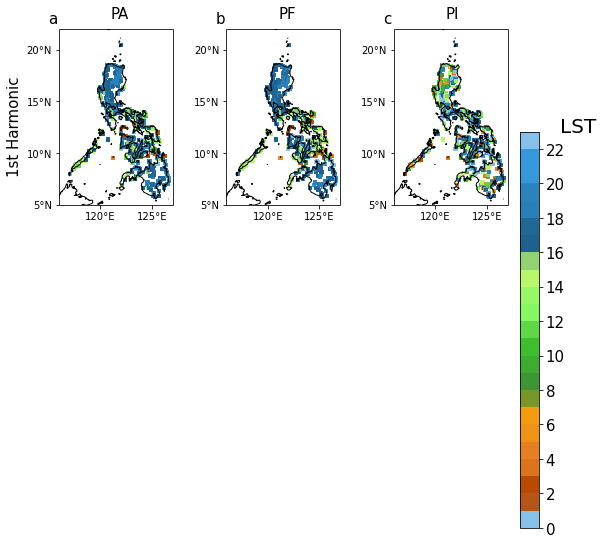

In [24]:
a4_dims = (20,20)

cmap = mycolorbar1
bounds = np.linspace(0, 23, 24)
norm = mcolors.BoundaryNorm(bounds,cmap.N)   
s = 10
fig = plt.figure(figsize=(8.5,11))
gs = fig.add_gridspec(3, 3)
ax1 = fig.add_subplot(gs[0, 0], projection=ccrs.PlateCarree())
plot_background(ax1)
plot_ticks(ax1)
back = phs_pa_harm1.to_dataframe("val").reset_index()
back = back[back['val'] > 0]
cs = ax1.scatter(back.iloc[:,0], back.iloc[:,1], c=back.iloc[:,2], norm=norm, cmap=cmap, s=s, marker="s",  transform=ccrs.PlateCarree())
ax1.set_xlim(116,127)
ax1.set_ylim(5,22)
ax1.text(121, 23, 'PA', fontsize=15)
ax1.text(111, 8, '1st Harmonic', rotation=90, fontsize=15)


######################
ax4 = fig.add_subplot(gs[0, 1], projection=ccrs.PlateCarree())
plot_background(ax4)
plot_ticks(ax4)
back = phs_pf_harm1.to_dataframe("val").reset_index()
back = back[back['val'] > 0]
cs = ax4.scatter(back.iloc[:,0], back.iloc[:,1], c=back.iloc[:,2], norm=norm, cmap=cmap, s=s, marker="s",  transform=ccrs.PlateCarree())
ax4.set_xlim(116,127)
ax4.set_ylim(5,22)
ax4.text(121, 23, 'PF', fontsize=15)


##################
######################
ax7 = fig.add_subplot(gs[0, 2], projection=ccrs.PlateCarree())
plot_background(ax7)
plot_ticks(ax7)
back = phs_pi_harm1.to_dataframe("val").reset_index()
back = back[back['val'] > 0]
cs = ax7.scatter(back.iloc[:,0], back.iloc[:,1], c=back.iloc[:,2], norm=norm, cmap=cmap, s=s, marker="s",  transform=ccrs.PlateCarree())
ax7.set_xlim(116,127)
ax7.set_ylim(5,22)
ax7.text(121, 23, 'PI', fontsize=15)



ax1.text(115, 22.5, 'a',  fontsize=15)
ax4.text(115, 22.5, 'b',  fontsize=15)
ax7.text(115, 22.5, 'c',  fontsize=15)

##################
cax = fig.add_axes([0.9, 0.25, 0.03, 0.5])
cb = fig.colorbar(cs, cax=cax)
labels = np.arange(0,23,2)
labels = np.arange(0,25,2)
loc    = labels 
cb.set_ticks(loc)
cb.set_ticklabels(labels)

cb.ax.tick_params(labelsize=15)
plt.text(50, 23, 'LST', fontsize=20)

images_dir = 'Images'
plt.savefig(f"{images_dir}/fig5_withTC_perhour.png", dpi=300, frameon=False, facecolor='white', bbox_inches="tight")